In [16]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

In [18]:
credentials = ServiceAccountCredentials.from_json_keyfile_name(
    "../../../gckey.json",
    [
        "https://spreadsheets.google.com/feeds",
        "https://www.googleapis.com/auth/drive",
    ],
)
client = gspread.authorize(credentials)
spreadsheet = client.open("MaLA data mixing ablation")
Flores_Llama_Selfish = spreadsheet.worksheet("Llama-3.1-8B-Selfish-BLEU")

In [19]:
Flores_Llama_Selfish_Data = Flores_Llama_Selfish.get_all_records(value_render_option="UNFORMATTED_VALUE")
df = pd.DataFrame(Flores_Llama_Selfish_Data, columns=Flores_Llama_Selfish_Data[0])
df = df.replace('', np.nan)

/tmp/ipykernel_3209181/467796845.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('', np.nan)


In [20]:
df

,Languages,Model,checkpoint-500,checkpoint-1000,checkpoint-1500,checkpoint-2000,checkpoint-2500,checkpoint-3000,checkpoint-3500,checkpoint-4000,checkpoint-4500
0,All,Llama-3.1-8B-Bilingual-Selfish,3.798436,3.418130,3.678223,3.122111,2.981192,2.787550,2.813320,NaN,NaN
1,All,Llama-3.1-8B-Bilingual-Code-Selfish,7.644659,4.913821,5.671752,5.113949,5.120737,5.134886,4.876639,4.747717,5.373775
2,All,Llama-3.1-8B-Monolingual-Selfish,20.278520,20.004368,19.062088,17.949037,18.166011,18.651623,NaN,NaN,NaN
3,All,Llama-3.1-8B-Monolingual-Code-Selfish,17.739172,19.725233,19.391240,19.122511,17.339548,18.367296,17.412423,NaN,NaN
4,High,Llama-3.1-8B-Bilingual-Selfish,9.332468,9.030186,9.615295,9.030725,8.825738,8.286869,8.319158,NaN,NaN
5,High,Llama-3.1-8B-Bilingual-Code-Selfish,17.046260,10.966706,12.945242,11.934622,11.754841,11.731314,11.060005,11.103177,12.854178
6,High,Llama-3.1-8B-Monolingual-Selfish,35.921161,33.821130,32.755149,31.584254,31.939083,32.047027,NaN,NaN,NaN
7,High,Llama-3.1-8B-Monolingual-Code-Selfish,30.670364,33.760228,33.517518,32.885288,30.319048,32.333427,31.020065,NaN,NaN
8,Medium,Llama-3.1-8B-Bilingual-Selfish,3.203512,2.981586,3.257006,2.894528,2.713266,2.662543,2.719358,NaN,NaN
9,Medium,Llama-3.1-8B-Bilingual-Code-Selfish,6.218322,4.109977,4.666569,4.165177,4.183312,4.001674,3.966147,3.933171,4.547478


In [21]:
df_dropped = df.drop(columns=["Languages"])
df_all, df_high, df_medium, df_low = [df_dropped.iloc[i:i+4] for i in range(0, len(df_dropped), 4)]

In [22]:
df_all

,Model,checkpoint-500,checkpoint-1000,checkpoint-1500,checkpoint-2000,checkpoint-2500,checkpoint-3000,checkpoint-3500,checkpoint-4000,checkpoint-4500
0,Llama-3.1-8B-Bilingual-Selfish,3.798436,3.418130,3.678223,3.122111,2.981192,2.787550,2.813320,NaN,NaN
1,Llama-3.1-8B-Bilingual-Code-Selfish,7.644659,4.913821,5.671752,5.113949,5.120737,5.134886,4.876639,4.747717,5.373775
2,Llama-3.1-8B-Monolingual-Selfish,20.278520,20.004368,19.062088,17.949037,18.166011,18.651623,NaN,NaN,NaN
3,Llama-3.1-8B-Monolingual-Code-Selfish,17.739172,19.725233,19.391240,19.122511,17.339548,18.367296,17.412423,NaN,NaN


In [23]:
model_info = {
    "Llama-3.1-8B-Bilingual-Code-Selfish": {
        "final_ckpt": 4500,
        "total_tokens": 300e6,  # 300M
    },
    "Llama-3.1-8B-Monolingual-Code-Selfish": {
        "final_ckpt": 3500,
        "total_tokens": 300e6,  # 300M
    },
    "Llama-3.1-8B-Bilingual-Selfish": {
        "final_ckpt": 3500, 
        "total_tokens": 200e6   # 200M
    },  
    "Llama-3.1-8B-Monolingual-Selfish": {
        "final_ckpt": 3000,
        "total_tokens": 200e6,  # 200M
    },
}


def ckpt_to_tokens(model_name: str, ckpt: int) -> float:
    """
    Given model name and checkpoint numbers, return the corresponding number of trained tokens.
    """
    info = model_info[model_name]
    final_ckpt = info["final_ckpt"]
    total_tokens = info["total_tokens"]
    if ckpt > final_ckpt:
        ckpt = final_ckpt

    return ckpt * (total_tokens / final_ckpt)

checkpoint_cols = [col for col in df.columns if col.startswith("checkpoint-")]

In [24]:
def vis(df, langs_catagory, base_score):
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(10, 6), dpi=120)

    for i, row in df.iterrows():
        model_name = row["Model"]
        if model_name not in model_info:
            continue

        ckpt_bleu_pairs = []
        for col in checkpoint_cols:
            val = row[col]
            if pd.notna(val) and val != "":
                ckpt = int(col.split("-")[1])
                x_tokens = ckpt_to_tokens(model_name, ckpt)
                y_bleu = float(val)
                ckpt_bleu_pairs.append((x_tokens, y_bleu))

        ckpt_bleu_pairs.sort(key=lambda x: x[0])

        xs = [p[0] for p in ckpt_bleu_pairs]
        ys = [p[1] for p in ckpt_bleu_pairs]

        plt.plot(
            xs, ys, marker="o", linestyle="-", linewidth=2, markersize=5, label=model_name
        )

    plt.axhline(y=base_score, color='red', linestyle='--', linewidth=1.5, label=f"Llama-3.1-8B Base")

    plt.xlabel("Training Tokens", fontsize=12)
    plt.ylabel("BLEU", fontsize=12)
    plt.title(f"BLEU({langs_catagory}) vs. Training Tokens", fontsize=14, fontweight="bold")

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(loc="best", fontsize=10)
    plt.tight_layout()

    plt.show()

In [25]:
def vis_smooth(df, langs_catagory, base_score):
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(10, 6), dpi=120)

    for i, row in df.iterrows():
        model_name = row["Model"]
        if model_name not in model_info:
            continue

        ckpt_bleu_pairs = []
        for col in checkpoint_cols:
            val = row[col]
            if pd.notna(val) and val != "":
                ckpt = int(col.split("-")[1])
                x_tokens = ckpt_to_tokens(model_name, ckpt)
                y_bleu = float(val)
                ckpt_bleu_pairs.append((x_tokens, y_bleu))

        ckpt_bleu_pairs.sort(key=lambda x: x[0])

        xs = np.array([p[0] for p in ckpt_bleu_pairs])
        ys = np.array([p[1] for p in ckpt_bleu_pairs])

        # Smoothing the curve
        if len(xs) > 2:  # Ensure sufficient points for smoothing
            x_smooth = np.linspace(xs.min(), xs.max(), 200)
            spline = make_interp_spline(xs, ys, k=3)  # k=3 for cubic spline
            y_smooth = spline(x_smooth)

            # Calculate stderr (replace with actual stderr calculation if available)
            stderr = np.std(ys) / np.sqrt(len(ys))
            y_lower = y_smooth - stderr
            y_upper = y_smooth + stderr

            # Plot smooth curve and stderr
            plt.plot(x_smooth, y_smooth, label=model_name, linewidth=2)
            plt.fill_between(x_smooth, y_lower, y_upper, alpha=0.2)
        else:
            # Plot raw data if not enough points for smoothing
            plt.plot(xs, ys, marker="o", linestyle="-", linewidth=2, markersize=5, label=model_name)

    plt.axhline(y=base_score, color='red', linestyle='--', linewidth=1.5, label=f"Llama-3.1-8B Base")

    plt.xlabel("Training Tokens", fontsize=12)
    plt.ylabel("BLEU", fontsize=12)
    plt.title(f"BLEU({langs_catagory}) vs. Training Tokens", fontsize=14, fontweight="bold")

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(loc="best", fontsize=10)
    plt.tight_layout()

    plt.show()

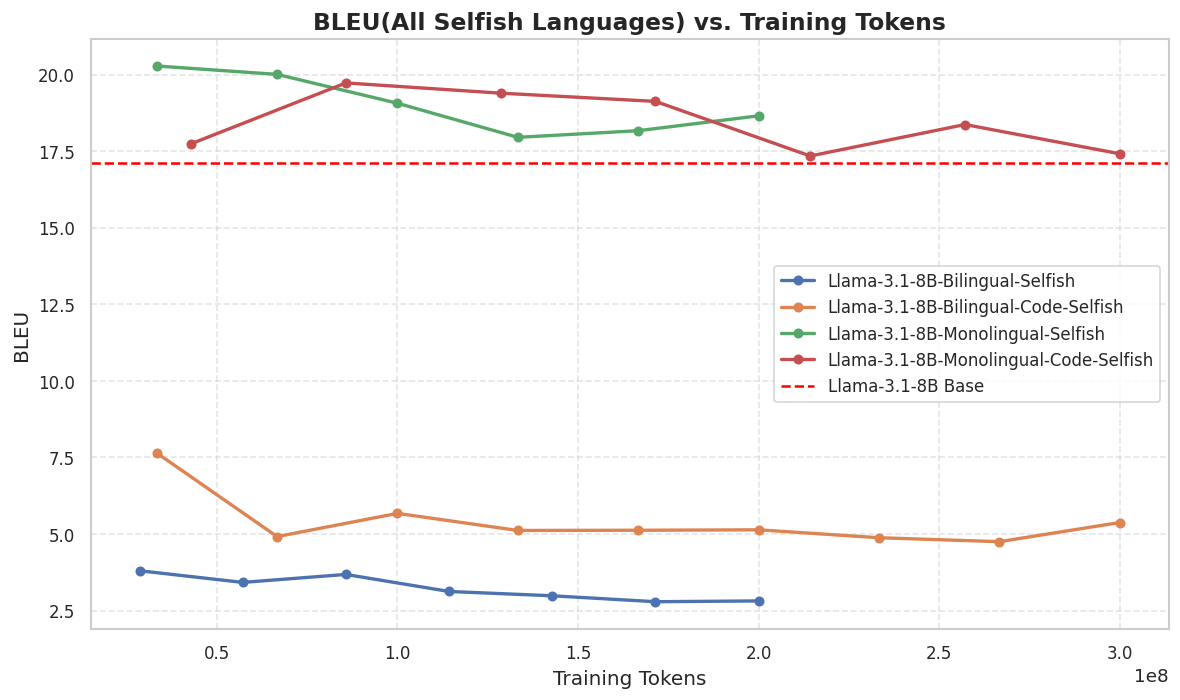

In [26]:
vis(df_all, "All Selfish Languages", 17.11)

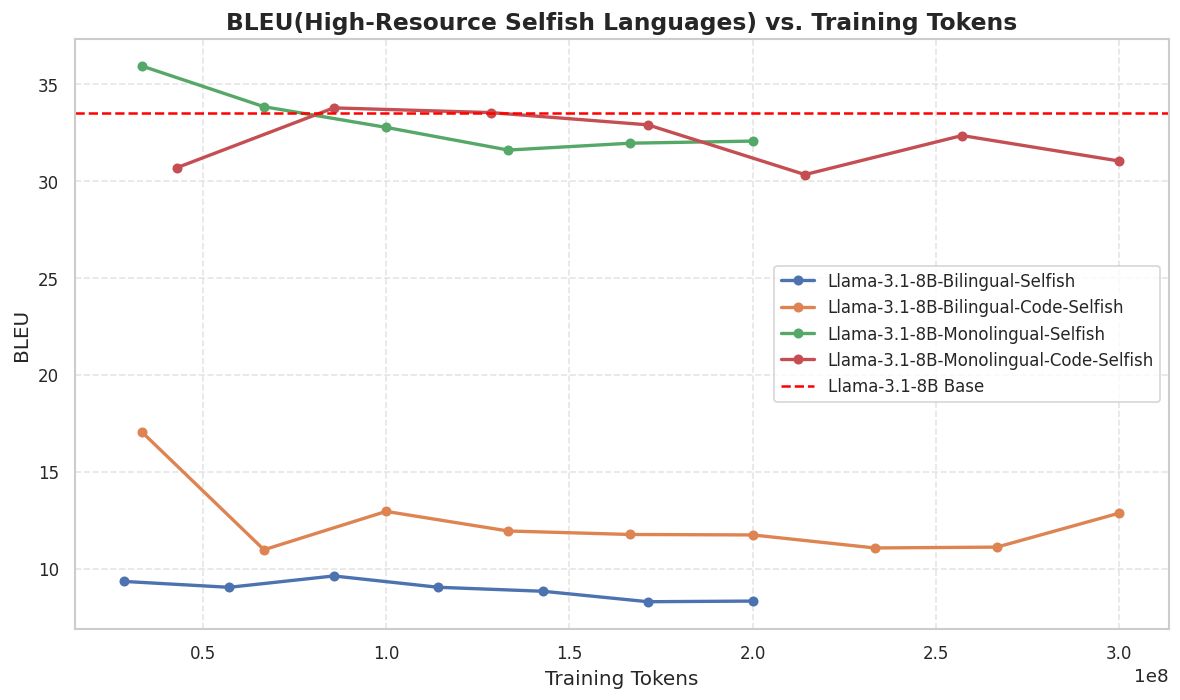

In [27]:
vis(df_high, "High-Resource Selfish Languages", 33.51)

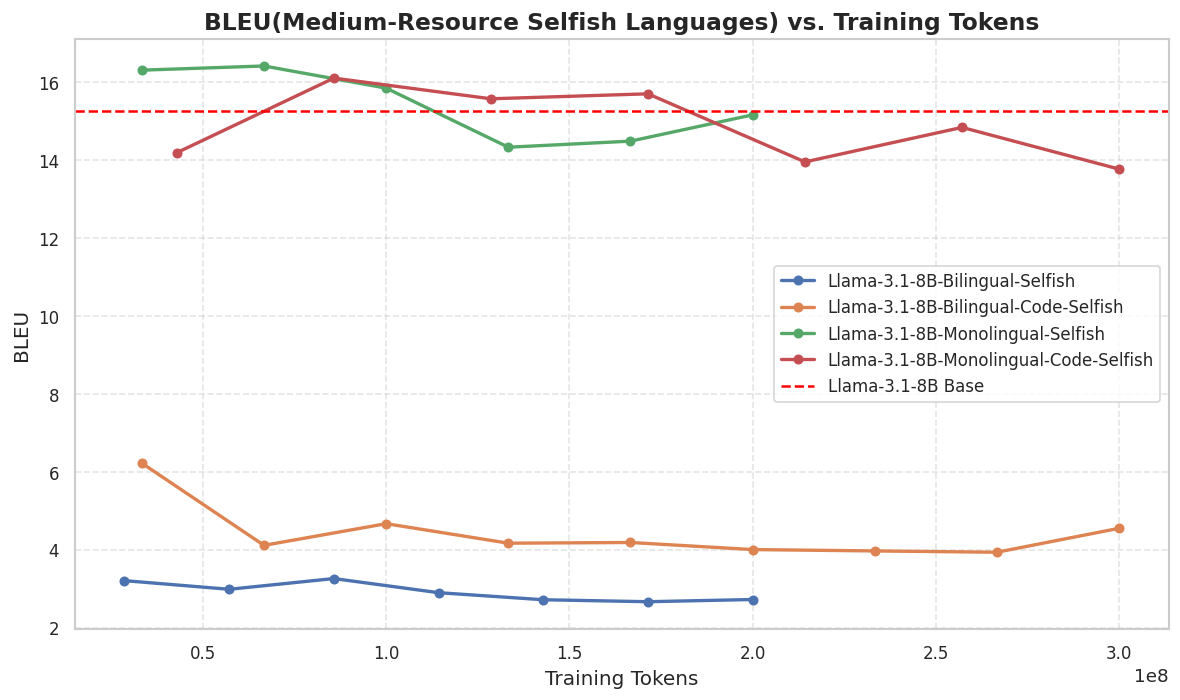

In [28]:
vis(df_medium, "Medium-Resource Selfish Languages", 15.26)

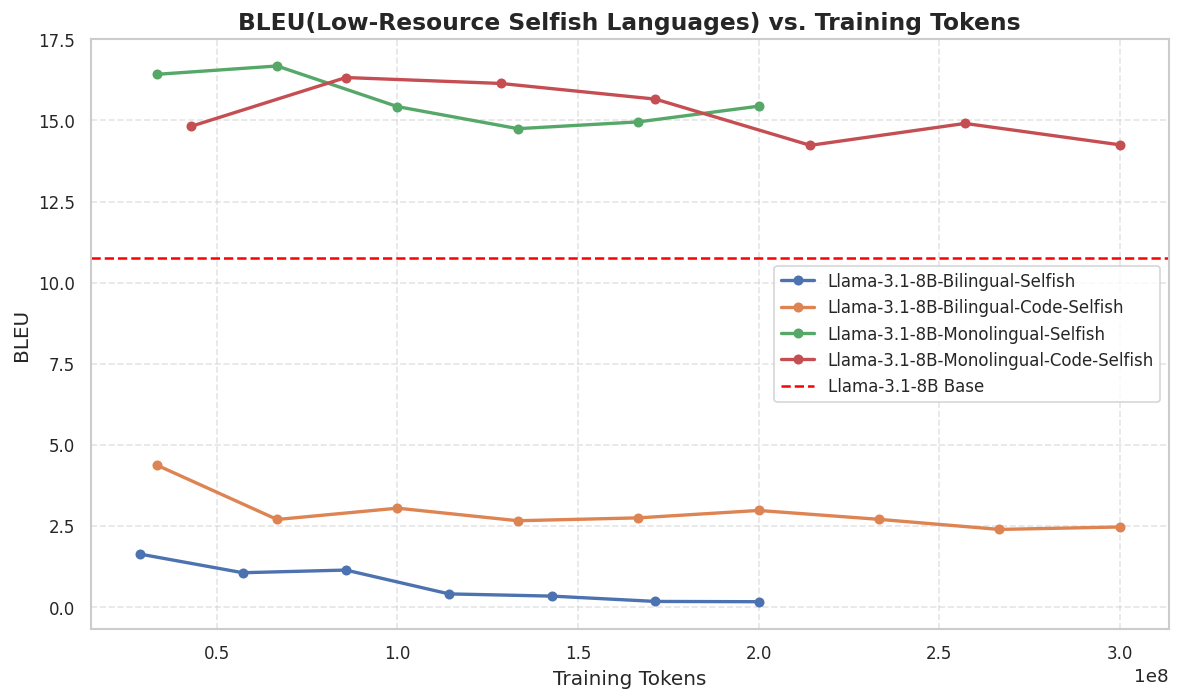

In [29]:
vis(df_low, "Low-Resource Selfish Languages", 10.76)

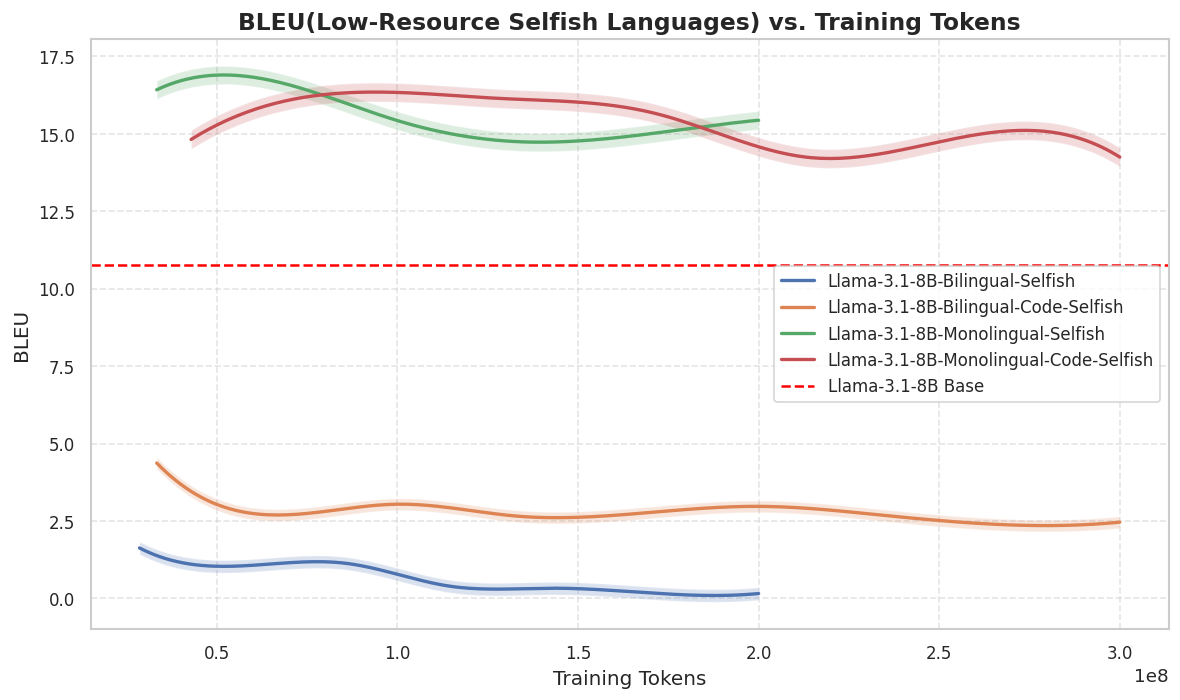

In [30]:
vis_smooth(df_low, "Low-Resource Selfish Languages", 10.76)